In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
label1 = np.array(pd.read_csv('data1_labels.csv',header = None))[0]
label2 = np.array(pd.read_csv('data2_labels.csv', header = None))[0]
print(label1.shape, label2.shape)

(4214,) (2638,)


In [3]:
cell_type_d1 = ['Monocytes', 'CD4 T', 'CD8 T', 'NK', 'B Cells', 'Dendritic Cells']
cell_type_d2 = ['Monocytes', 'CD4 T', 'CD8 T', 'NK', 'B Cells', 'Dendritic Cells', 'Megakaryocytes']

In [4]:
data1_assignment = np.array(pd.read_csv('results/data1_node_assignment.csv'))[0]
data2_assignment = np.array(pd.read_csv('results/data2_node_assignment.csv'))[0]

In [5]:
num_nodes = 100
d1_labels = []
d2_labels = []
for i in range(num_nodes):
    idx1 = np.where(data1_assignment == i)[0]
    idx2 = np.where(data2_assignment == i)[0]
    d1_labels.append(label1[idx1])
    d2_labels.append(label2[idx2])

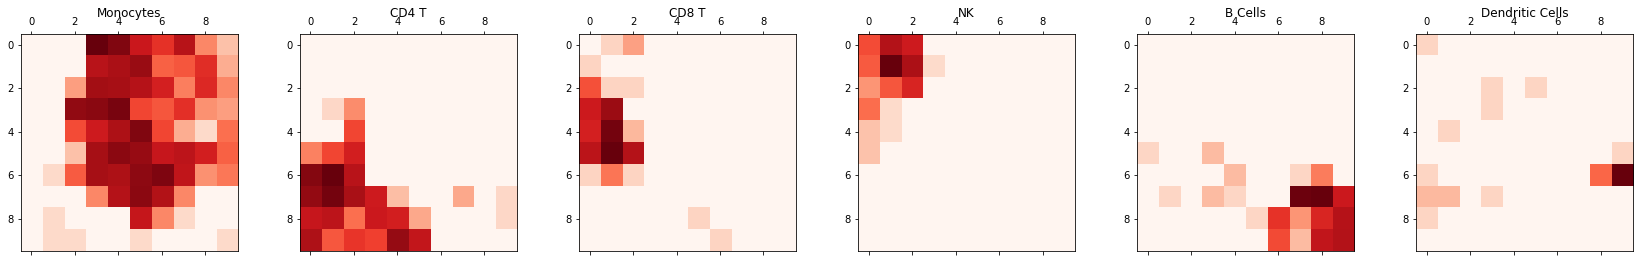

In [6]:
fig, axs = plt.subplots(1,len(np.unique(label1)), figsize=(30, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
unq_labels = np.unique(label1)
for ct, unq_label in enumerate(unq_labels):
    heatmap = []
    for i in range(len(d1_labels)):
        no = len(np.where(d1_labels[i] == unq_label)[0])
        heatmap.append(np.log1p(no))
    axs[ct].matshow(np.reshape(np.array(heatmap/np.sum(heatmap)),(10,10)),cmap = 'Reds')
    axs[ct].set_title(np.array(cell_type_d1)[ct])

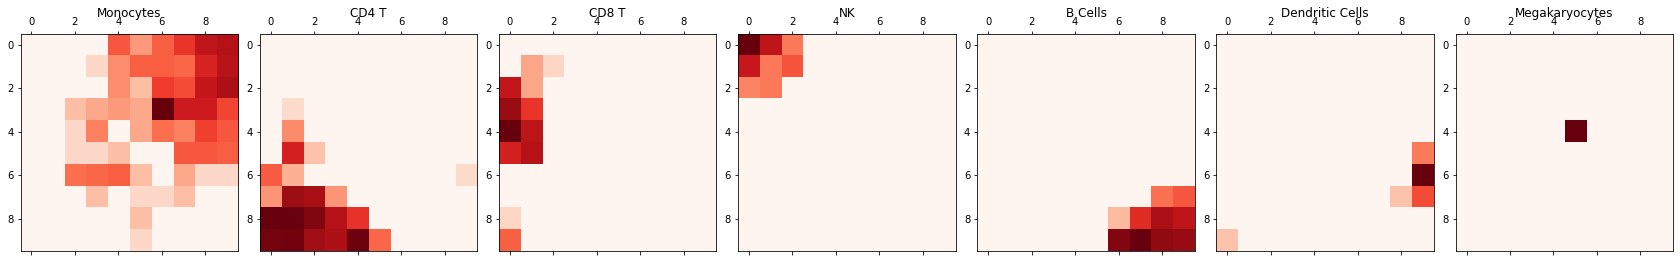

In [7]:
fig, axs = plt.subplots(1,len(np.unique(label2)), figsize=(30, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
unq_labels = np.unique(label2)
for ct, unq_label in enumerate(unq_labels):
    heatmap = []
    for i in range(len(d2_labels)):
        no = len(np.where(d2_labels[i] == unq_label)[0])
        heatmap.append(np.log1p(no))
    axs[ct].matshow(np.reshape(np.array(heatmap/np.sum(heatmap)),(10,10)),cmap = 'Reds')
    axs[ct].set_title(np.array(cell_type_d2)[ct])

In [8]:
data1_cluster_assignment = np.array(pd.read_csv('results/data1_cluster_assignment.csv'))[0]
data2_cluster_assignment = np.array(pd.read_csv('results/data2_cluster_assignment.csv'))[0]

In [9]:
num_clusters = 10
unq_labels1 = np.unique(label1)
COUNTS1 = []
for cluster in range(num_clusters):
    tmp_labels = label1[np.where(data1_cluster_assignment == cluster + 1)[0]]
    NO = []
    for label in unq_labels1:
        no = len(np.where(tmp_labels == label)[0])
        NO.append(no)
    COUNTS1.append(NO)
unq_labels2 = np.unique(label2)
COUNTS2 = []
for cluster in range(num_clusters):
    tmp_labels = label2[np.where(data2_cluster_assignment == cluster + 1)[0]]
    NO = []
    for label in unq_labels2:
        no = len(np.where(tmp_labels == label)[0])
        NO.append(no)
    COUNTS2.append(NO)
COUNTS1 = 100 * (COUNTS1 / np.sum(COUNTS1,0))
COUNTS2 = 100 * (COUNTS2 / np.sum(COUNTS2,0))

COUNTS1[np.isnan(COUNTS1)] = 0
COUNTS2[np.isnan(COUNTS2)] = 0

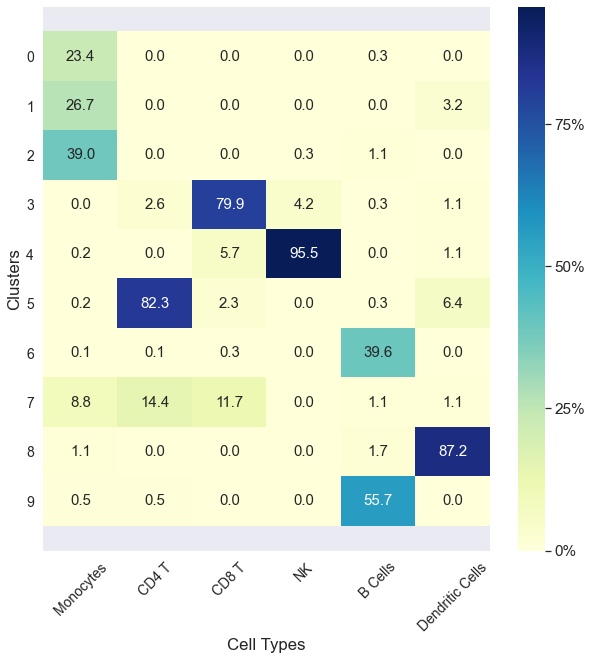

In [10]:
nr, nm = COUNTS1.shape
df_cm = pd.DataFrame(COUNTS1, range(nr),
                  range(6))
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 15}, cmap="YlGnBu",fmt='.1f')# font size
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75, 100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])

ax.set_xticklabels(cell_type_d1)
ax.set_ylabel('Clusters')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14,rotation=0)
ax.set_xlabel('Cell Types')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

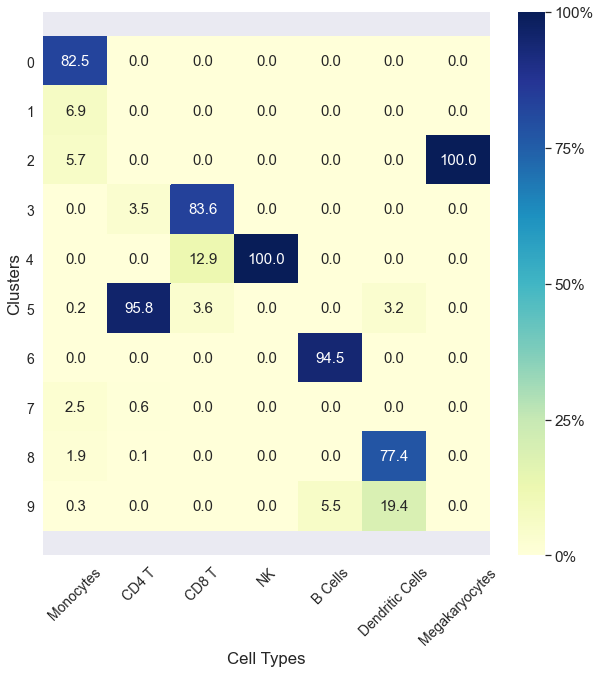

In [11]:
nr, nm = COUNTS1.shape
df_cm = pd.DataFrame(COUNTS2, range(nr),
                  range(7))
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 15}, cmap="YlGnBu",fmt='.1f')# font size
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75, 100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])

ax.set_xticklabels(cell_type_d2)
ax.set_ylabel('Clusters')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14,rotation=0)
ax.set_xlabel('Cell Types')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()